<a href="https://colab.research.google.com/github/livieee/Software-Engineering-Management/blob/main/SEM_Projects.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1. Import Dataset

In [ ]:
# Install scanpy if not installed
!pip install scanpy

In [ ]:
# Import libraries
import urllib.request
import scanpy as sc

# Download and load MTG dataset
urllib.request.urlretrieve(
    'https://datasets.cellxgene.cziscience.com/32b32549-9c68-453d-91c6-74acad9df928.h5ad',
    'Microglia_PVM_MTG.h5ad'
)
adata_mtg = sc.read_h5ad('Microglia_PVM_MTG.h5ad')
print("MTG Dataset:")
print(adata_mtg)

# Download and load DLPFC dataset
urllib.request.urlretrieve(
    'https://datasets.cellxgene.cziscience.com/6ea7ef32-8a23-40d2-8870-811df2fb2d53.h5ad',
    'Microglia_PVM_DLPFC.h5ad'
)
adata_dlpfc = sc.read_h5ad('Microglia_PVM_DLPFC.h5ad')
print("DLPFC Dataset:")
print(adata_dlpfc)


MTG Dataset:
AnnData object with n_obs × n_vars = 40000 × 36412
    obs: 'assay_ontology_term_id', 'cell_type_ontology_term_id', 'disease_ontology_term_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sex_ontology_term_id', 'tissue_ontology_term_id', 'is_primary_data', 'Neurotypical reference', 'Class', 'Subclass', 'Supertype', 'Age at death', 'Years of education', 'Cognitive status', 'ADNC', 'Braak stage', 'Thal phase', 'CERAD score', 'APOE4 status', 'Lewy body disease pathology', 'LATE-NC stage', 'Microinfarct pathology', 'Specimen ID', 'donor_id', 'PMI', 'Number of UMIs', 'Genes detected', 'Fraction mitochrondrial UMIs', 'suspension_type', 'development_stage_ontology_term_id', 'Continuous Pseudo-progression Score', 'tissue_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'observation_joinid'
    var: 'feature_is_filtered', 'feature_name', 'feature_reference', 'feature_biotype', 'feature

In [ ]:
# Extract and display the values under each attribute in obs
# 2. mtg
for obs_attr in adata_mtg.obs.columns:
    print(f"\nValues for adata_mtg obs attribute '{obs_attr}':")
    print(adata_mtg.obs[obs_attr].values)

# Extract and display the values under each attribute in var
for var_attr in adata_mtg.var.columns:
    print(f"\nValues for adata_mtg var attribute '{var_attr}':")
    print(adata_mtg.var[var_attr].values)

# 2. dlpfc
# Extract and display the values under each attribute in obs
for obs_attr in adata_dlpfc.obs.columns:
    print(f"\nValues for adata_dlpfc obs attribute '{obs_attr}':")
    print(adata_mtg.obs[obs_attr].values)

# Extract and display the values under each attribute in var
for var_attr in adata_dlpfc.var.columns:
    print(f"\nValues for adata_dlpfc var attribute '{var_attr}':")
    print(adata_mtg.var[var_attr].values)


Values for adata_mtg obs attribute 'assay_ontology_term_id':
['EFO:0009922', 'EFO:0009922', 'EFO:0009922', 'EFO:0009922', 'EFO:0009922', ..., 'EFO:0009922', 'EFO:0009922', 'EFO:0009922', 'EFO:0009922', 'EFO:0009922']
Length: 40000
Categories (2, object): ['EFO:0009922', 'EFO:0030059']

Values for adata_mtg obs attribute 'cell_type_ontology_term_id':
['CL:0000129', 'CL:0000129', 'CL:0000129', 'CL:0000129', 'CL:0000129', ..., 'CL:0000129', 'CL:0000129', 'CL:0000129', 'CL:0000129', 'CL:0000129']
Length: 40000
Categories (1, object): ['CL:0000129']

Values for adata_mtg obs attribute 'disease_ontology_term_id':
['MONDO:0001627', 'PATO:0000461', 'MONDO:0001627', 'PATO:0000461', 'PATO:0000461', ..., 'PATO:0000461', 'MONDO:0001627', 'MONDO:0001627', 'MONDO:0001627', 'PATO:0000461']
Length: 40000
Categories (2, object): ['MONDO:0001627', 'PATO:0000461']

Values for adata_mtg obs attribute 'self_reported_ethnicity_ontology_term_id':
['HANCESTRO:0005', 'HANCESTRO:0005', 'HANCESTRO:0005', 'HANCE

# 1. Data Preprocessing


## a. Quality Control (QC):


Filter Out Low-Quality Cells:
*   Remove cells with a low number of genes detected (Genes detected).
*   Exclude cells with extremely high or low Number of UMIs to avoid doublets or dead cells.
*   Filter out cells with high Fraction mitochondrial UMIs as this indicates cell
*   Filter out cells with high Fraction mitochondrial UMIs as this indicates cell stress or apoptosis.




Filtering low-quality cells in MTG dataset...


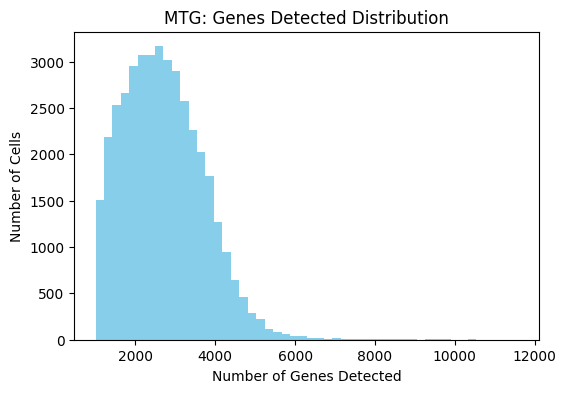

Cells with at least 500 genes detected: 40000


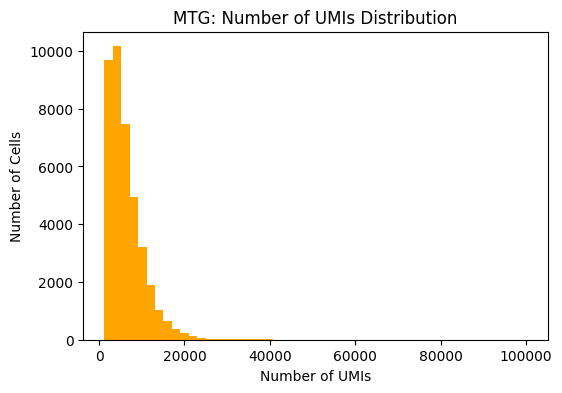

Cells with UMIs between 1000 and 25000: 39820


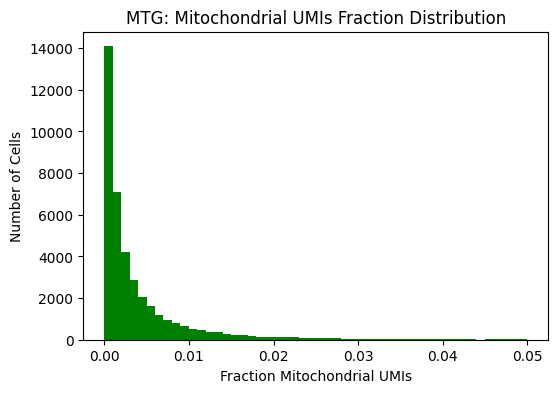

Cells with mitochondrial fraction ≤ 0.05: 39820
Final number of high-quality cells in MTG: 39820

Filtering low-quality cells in DLPFC dataset...


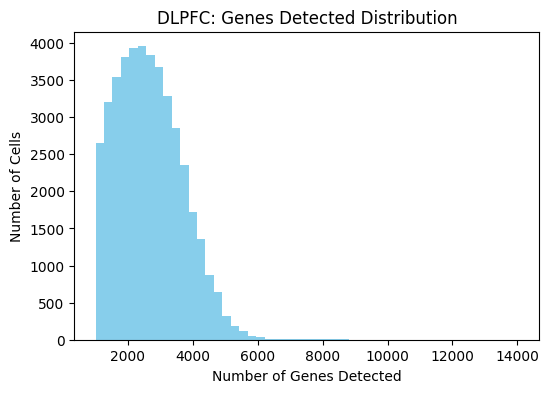

Cells with at least 500 genes detected: 42486


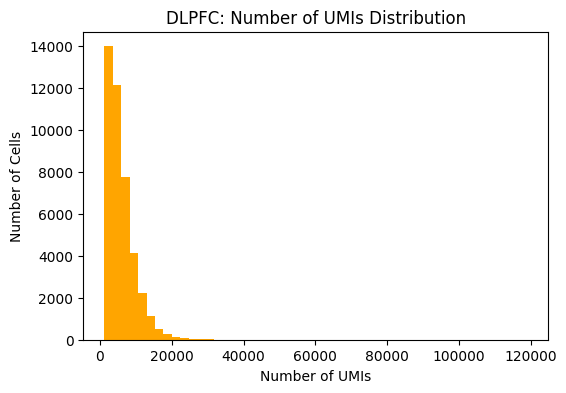

Cells with UMIs between 1000 and 25000: 42404


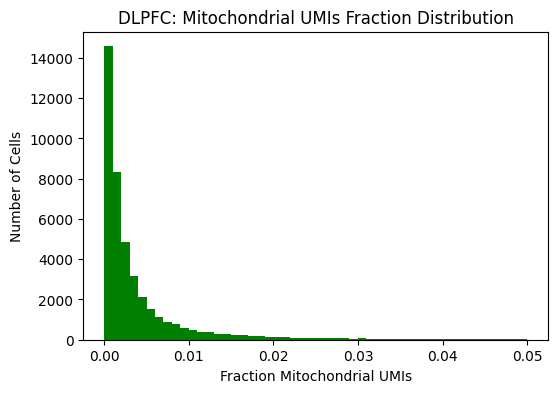

Cells with mitochondrial fraction ≤ 0.05: 42404
Final number of high-quality cells in DLPFC: 42404


In [ ]:
import matplotlib.pyplot as plt

# Function to filter out low-quality cells
def filter_low_quality_cells(adata, dataset_name):
    print(f"\nFiltering low-quality cells in {dataset_name} dataset...")

    # Plot histogram of 'Genes detected' to decide on a minimum threshold
    plt.figure(figsize=(6, 4))
    plt.hist(adata.obs['Genes detected'], bins=50, color='skyblue')  # Reduced bins to 50
    plt.xlabel('Number of Genes Detected')
    plt.ylabel('Number of Cells')
    plt.title(f'{dataset_name}: Genes Detected Distribution')
    plt.show()
    plt.close()  # Clear figure to reduce memory usage

    # Set a minimum number of genes detected per cell
    min_genes = 500  # Adjust this threshold based on the histogram
    adata = adata[adata.obs['Genes detected'] >= min_genes, :]
    print(f"Cells with at least {min_genes} genes detected: {adata.n_obs}")

    # Plot histogram of 'Number of UMIs' to decide on thresholds
    plt.figure(figsize=(6, 4))
    plt.hist(adata.obs['Number of UMIs'], bins=50, color='orange')  # Reduced bins to 50
    plt.xlabel('Number of UMIs')
    plt.ylabel('Number of Cells')
    plt.title(f'{dataset_name}: Number of UMIs Distribution')
    plt.show()
    plt.close()  # Clear figure to reduce memory usage

    # Set thresholds for UMIs to exclude doublets or dead cells
    min_umis = 1000   # Adjust based on the histogram
    max_umis = 25000  # Adjust based on the histogram
    adata = adata[(adata.obs['Number of UMIs'] >= min_umis) & (adata.obs['Number of UMIs'] <= max_umis), :]
    print(f"Cells with UMIs between {min_umis} and {max_umis}: {adata.n_obs}")

    # Plot histogram of 'Fraction mitochondrial UMIs' to decide on a maximum threshold
    plt.figure(figsize=(6, 4))
    plt.hist(adata.obs['Fraction mitochrondrial UMIs'], bins=50, color='green')  # Reduced bins to 50
    plt.xlabel('Fraction Mitochondrial UMIs')
    plt.ylabel('Number of Cells')
    plt.title(f'{dataset_name}: Mitochondrial UMIs Fraction Distribution')
    plt.show()
    plt.close()  # Clear figure to reduce memory usage

    # Set a maximum acceptable mitochondrial fraction
    max_mito = 0.05  # Typically between 5% and 10%
    adata = adata[adata.obs['Fraction mitochrondrial UMIs'] <= max_mito, :]
    print(f"Cells with mitochondrial fraction ≤ {max_mito}: {adata.n_obs}")

    print(f"Final number of high-quality cells in {dataset_name}: {adata.n_obs}")
    return adata

# Apply the filtering function on the datasets
try:
    adata_mtg_filtered = filter_low_quality_cells(adata_mtg, 'MTG')
    adata_dlpfc_filtered = filter_low_quality_cells(adata_dlpfc, 'DLPFC')
except MemoryError:
    print("The session ran out of memory. Please try further reducing the dataset size or consider sampling.")



*   Normalize Data:
*   Use methods like log-normalization to make gene expression levels comparable across cells.
*   Implement scaling to adjust for differences in sequencing depth.






```
# This is formatted as code
```

## b. Batch Correction:

Identify Batches:


*   Use metadata like Specimen ID or donor_id to identify different batches or donors.




Processing MTG dataset...

MTG Dataset Batch Information:
Batch Information (using 'Specimen ID'): 
 Specimen ID
M2TX_210329_202_F01      582
M1TX_210816_161_F01      491
M1TX_210816_161_E01      481
M2TX_210426_208_A01      463
M2TX_210624_205_D01      461
                        ... 
M2TX_210316_204_E01       12
M1TX_190916_106_B01        5
M2XM_210924_211-R_A01      3
M1TX_191216_107_D01        1
M1TX_190822_101_D01        1
Name: count, Length: 227, dtype: int64


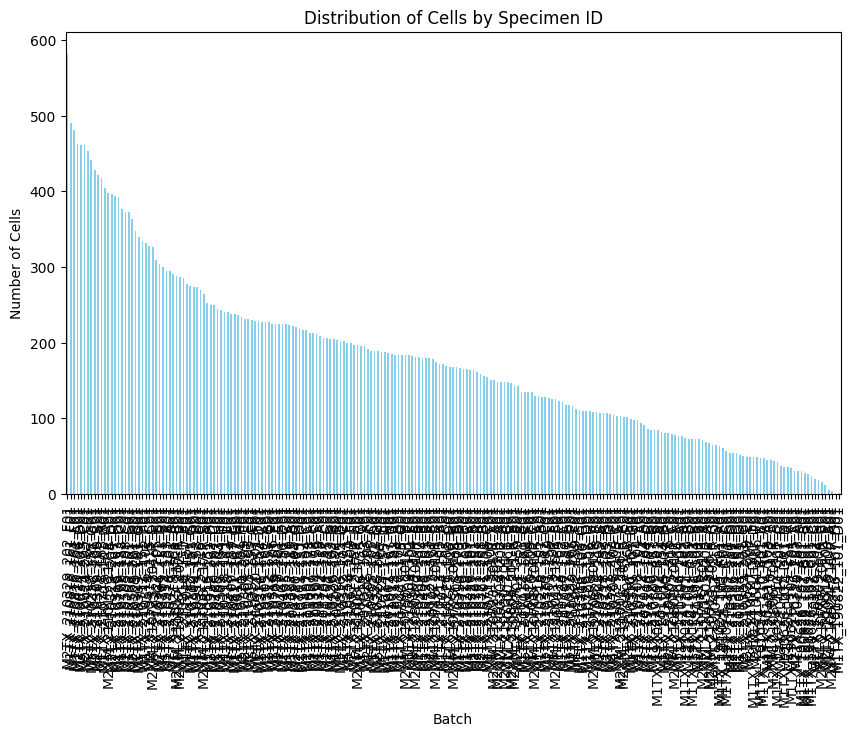

In [ ]:
# Function to identify batch information
def identify_batch_info(adata, batch_key='Specimen ID', plot=True):
    # Verify batch key exists
    if batch_key not in adata.obs.columns:
        raise ValueError(f"Batch key '{batch_key}' not found in metadata")

    # Get batch information
    batch_info = adata.obs[batch_key].value_counts()
    print(f"Batch Information (using '{batch_key}'): \n", batch_info)

    # Optionally plot batch distribution
    if plot:
        plt.figure(figsize=(10, 6))
        batch_info.plot(kind='bar', color='skyblue')
        plt.xlabel('Batch')
        plt.ylabel('Number of Cells')
        plt.title(f'Distribution of Cells by {batch_key}')
        plt.show()

    return batch_info

# Call the function with corrected batch key
try:
    print("Processing MTG dataset...")
    print("\nMTG Dataset Batch Information:")
    mtg_batches = identify_batch_info(adata_mtg, batch_key='Specimen ID')
except ValueError as e:
    print(e)


	•	Apply Correction Methods:
	•	Use tools like Harmony, ComBat, or Scanorama to correct for batch effects.

# 2. Categorization Based on Disease Stage and APOE4 Status

## a. Define Disease Stages:

Early Stage AD:

*  Use Cognitie status: ‘No dementia’ with signs of mild cognitive impairment.
*  Braak stage: Lower stages (e.g., ‘Braak 0’ to ‘Braak III’).

Number of cells in early stage: 2594
Number of cells in late stage: 23413


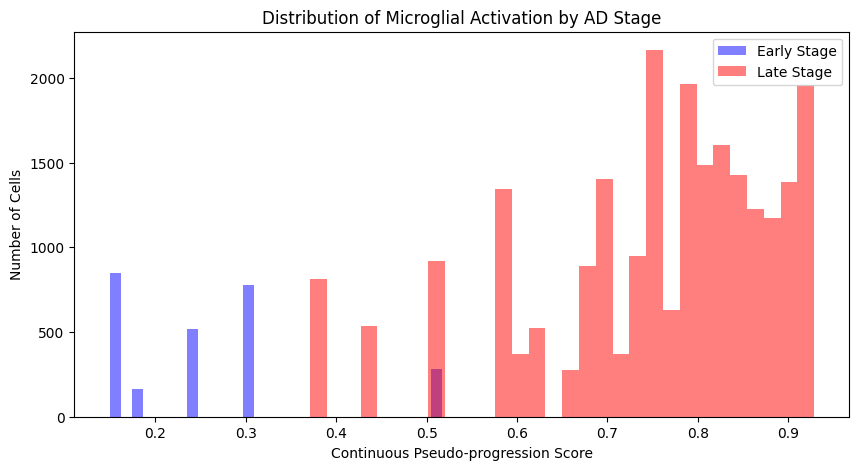

T-statistic: -212.0989479191894
P-value: 0.0
There is a statistically significant difference in microglial activation between early and late stages.


In [ ]:
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt

# Define activation metric column name
activation_metric = 'Continuous Pseudo-progression Score'  # Adjust if a different metric is relevant

# Define early and late stage conditions based on revised criteria
early_stage_conditions = (
    (adata_mtg.obs['ADNC'] == 'Low') &
    (adata_mtg.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) &
    (adata_mtg.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2'])) &
    (adata_mtg.obs['CERAD score'].isin(['Sparse', 'Absent']))
)

late_stage_conditions = (
    (adata_mtg.obs['ADNC'].isin(['Intermediate', 'High'])) &
    (adata_mtg.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) &
    (adata_mtg.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5'])) &
    (adata_mtg.obs['CERAD score'].isin(['Moderate', 'Frequent']))
)

# Filter data for early and late stages based on the revised criteria
early_stage_data = adata_mtg.obs[early_stage_conditions][activation_metric].dropna()
late_stage_data = adata_mtg.obs[late_stage_conditions][activation_metric].dropna()

# Display counts for each group
print("Number of cells in early stage:", early_stage_data.shape[0])
print("Number of cells in late stage:", late_stage_data.shape[0])

# Visualize the activation metric distribution for early and late stages
plt.figure(figsize=(10, 5))
plt.hist(early_stage_data, bins=30, alpha=0.5, label='Early Stage', color='blue')
plt.hist(late_stage_data, bins=30, alpha=0.5, label='Late Stage', color='red')
plt.xlabel(activation_metric)
plt.ylabel('Number of Cells')
plt.title('Distribution of Microglial Activation by AD Stage')
plt.legend()
plt.show()

# Perform a t-test to compare activation between early and late stages
t_stat, p_value = stats.ttest_ind(early_stage_data, late_stage_data, equal_var=False)

# Output results
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("There is a statistically significant difference in microglial activation between early and late stages.")
else:
    print("There is no statistically significant difference in microglial activation between early and late stages.")


Late Stage AD:


*   Cognitive status: ‘Dementia’.
*   Braak stage: Higher stages (e.g., ‘Braak IV’ to ‘Braak VI’).


## b. Group by APOE4 Status:

APOE4 Carriers:
*   APOE4 status: ‘Y’.




In [ ]:
import numpy as np
from scipy.stats import ttest_ind

# Define new groupings based on Braak stage, Thal phase, and ADNC
# Early Stage: ADNC = 'Low' OR (Braak stage ≤ III OR Thal phase ≤ 2)
# Late Stage: ADNC = 'Intermediate' or 'High' OR (Braak stage ≥ IV OR Thal phase ≥ 3)

# Filter based on Braak stage, Thal phase, and ADNC for APOE4 Carriers (Early and Late stages)
early_stage_carriers = adata_mtg_filtered.obs[
    (adata_mtg_filtered.obs['APOE4 status'] == 'Y') &
    (
        (adata_mtg_filtered.obs['ADNC'] == 'Low') |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]['Continuous Pseudo-progression Score'].dropna()

late_stage_carriers = adata_mtg_filtered.obs[
    (adata_mtg_filtered.obs['APOE4 status'] == 'Y') &
    (
        adata_mtg_filtered.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]['Continuous Pseudo-progression Score'].dropna()

# Filter based on Braak stage, Thal phase, and ADNC for APOE4 Non-Carriers (Early and Late stages)
early_stage_non_carriers = adata_mtg_filtered.obs[
    (adata_mtg_filtered.obs['APOE4 status'] == 'N') &
    (
        (adata_mtg_filtered.obs['ADNC'] == 'Low') |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]['Continuous Pseudo-progression Score'].dropna()

late_stage_non_carriers = adata_mtg_filtered.obs[
    (adata_mtg_filtered.obs['APOE4 status'] == 'N') &
    (
        adata_mtg_filtered.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]['Continuous Pseudo-progression Score'].dropna()

# Display cell counts for each group
print(f"APOE4 Carriers - Early Stage Cells: {len(early_stage_carriers)}")
print(f"APOE4 Carriers - Late Stage Cells: {len(late_stage_carriers)}")
print(f"APOE4 Non-Carriers - Early Stage Cells: {len(early_stage_non_carriers)}")
print(f"APOE4 Non-Carriers - Late Stage Cells: {len(late_stage_non_carriers)}")

# Perform t-tests for APOE4 carriers and non-carriers separately
if len(early_stage_carriers) > 0 and len(late_stage_carriers) > 0:
    t_stat_carriers, p_val_carriers = ttest_ind(early_stage_carriers, late_stage_carriers, equal_var=False)
    print(f"T-statistic for APOE4 Carriers (Early vs Late): {t_stat_carriers}")
    print(f"P-value for APOE4 Carriers (Early vs Late): {p_val_carriers}")
else:
    print("Insufficient data for APOE4 Carriers in either early or late stage.")

if len(early_stage_non_carriers) > 0 and len(late_stage_non_carriers) > 0:
    t_stat_non_carriers, p_val_non_carriers = ttest_ind(early_stage_non_carriers, late_stage_non_carriers, equal_var=False)
    print(f"T-statistic for APOE4 Non-Carriers (Early vs Late): {t_stat_non_carriers}")
    print(f"P-value for APOE4 Non-Carriers (Early vs Late): {p_val_non_carriers}")
else:
    print("Insufficient data for APOE4 Non-Carriers in either early or late stage.")


APOE4 Carriers - Early Stage Cells: 637
APOE4 Carriers - Late Stage Cells: 11455
APOE4 Non-Carriers - Early Stage Cells: 12015
APOE4 Non-Carriers - Late Stage Cells: 23879
T-statistic for APOE4 Carriers (Early vs Late): -25.553977658488918
P-value for APOE4 Carriers (Early vs Late): 6.42543815215523e-101
T-statistic for APOE4 Non-Carriers (Early vs Late): -102.67992236222808
P-value for APOE4 Non-Carriers (Early vs Late): 0.0


Key Findings:
APOE4 Carriers:

The significant difference in microglial activation between early and late stages for APOE4 carriers supports the hypothesis that microglial activation changes as Alzheimer's progresses in individuals with the APOE4 gene. Given the negative t-statistic, this might indicate a shift in the nature of microglial activation—potentially from a protective role in the early stages to a more harmful or neurotoxic role in the later stages.
APOE4 Non-Carriers:

Similarly, the significant difference in microglial activation between early and late stages for APOE4 non-carriers suggests that this shift in microglial activity is not exclusive to APOE4 carriers. However, the larger t-statistic in non-carriers might imply a more pronounced change in microglial activation across stages for those without the APOE4 gene, or simply that there’s a consistent progression in microglial activation as the disease advances regardless of APOE4 status.

Conclusion:
The results support the hypothesis that microglial activation shifts between early and late stages in Alzheimer’s disease. However, the shift occurs in both APOE4 carriers and non-carriers, indicating that while APOE4 may influence Alzheimer's progression, changes in microglial activation between early and late stages are a broader characteristic of the disease progression and not limited solely to APOE4 carriers.

Further Analysis:
To fully validate these findings and understand the nuances, further statistical tests or adjustments might be needed to control for additional variables or confirm the biological implications of these observed differences in microglial activation across Alzheimer’s stages.

#3. Differential Gene Expression Analysis

## a. Compare Gene Expression Profiles:

Between Disease Stages:

Compare microglial cells from early-stage vs. late-stage within the same APOE4 status.


Running differential expression analysis for APOE4 Carriers:


<ipython-input-8-8933f912c622>:54: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined = adata_early.concatenate(adata_late, batch_key="stage", batch_categories=["Early", "Late"])



Top 10 differentially expressed genes for APOE4 Carriers (Early vs Late):
             names     scores  logfoldchanges         pvals     pvals_adj
0  ENSG00000182601  14.598922        4.351686  2.853239e-48  5.194606e-44
1  ENSG00000101463  13.727571        5.913156  6.942286e-43  8.426084e-39
2  ENSG00000120254  11.918560        2.828820  9.473125e-33  6.898709e-29
3  ENSG00000184156  11.671913        6.338829  1.773894e-31  1.076517e-27
4  ENSG00000198879  11.344037        6.640051  7.939584e-30  2.890961e-26
5  ENSG00000145335  11.272224        1.844214  1.799643e-29  5.957145e-26
6  ENSG00000198840  11.180011        3.648623  5.108364e-29  1.430813e-25
7  ENSG00000186417  10.007424        2.380973  1.413852e-23  2.860066e-20
8  ENSG00000249738   9.953507        4.630731  2.434486e-23  4.665500e-20
9  ENSG00000171587   9.866110        2.618465  5.838515e-23  1.062960e-19


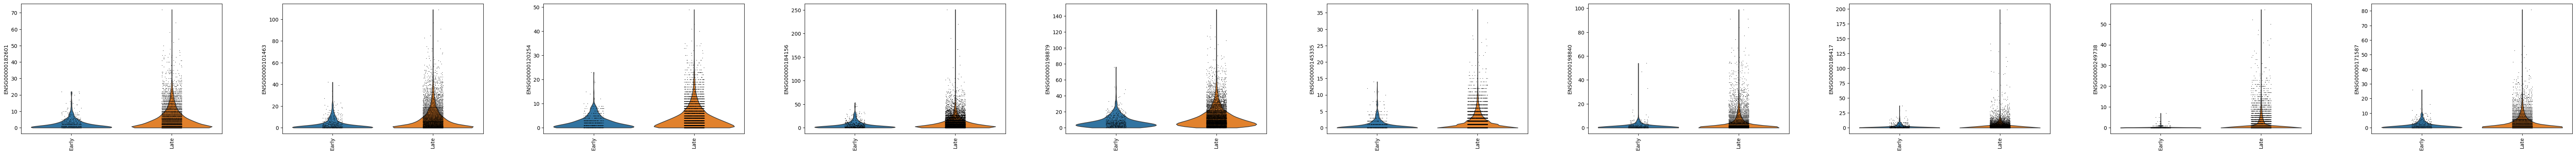

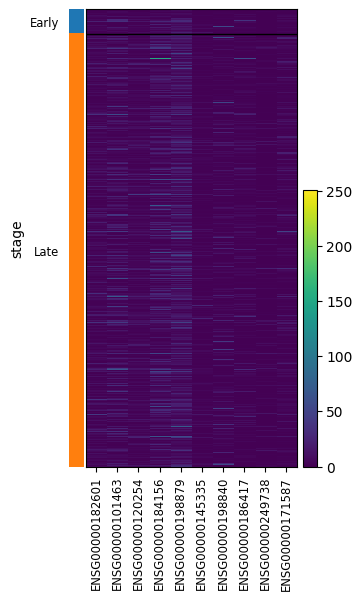

Running differential expression analysis for APOE4 Non-Carriers:


<ipython-input-8-8933f912c622>:54: FutureWarning: Use anndata.concat instead of AnnData.concatenate, AnnData.concatenate is deprecated and will be removed in the future. See the tutorial for concat at: https://anndata.readthedocs.io/en/latest/concatenation.html
  combined = adata_early.concatenate(adata_late, batch_key="stage", batch_categories=["Early", "Late"])



Top 10 differentially expressed genes for APOE4 Non-Carriers (Early vs Late):
             names     scores  logfoldchanges          pvals      pvals_adj
0  ENSG00000198840  30.801765        3.329631  2.481622e-208  9.036081e-204
1  ENSG00000096060  30.387529        5.004310  8.027665e-203  1.461517e-198
2  ENSG00000198899  27.628040        2.371413  5.124541e-168  6.219827e-164
3  ENSG00000112576  27.308861        1.522076  3.329060e-164  3.030444e-160
4  ENSG00000198712  25.597404        1.960547  1.630485e-144  1.187385e-140
5  ENSG00000198886  25.296057        1.917750  3.529846e-141  2.142146e-137
6  ENSG00000198888  25.051104        1.563383  1.698189e-138  8.833493e-135
7  ENSG00000198727  24.401169        1.844175  1.662016e-131  7.564664e-128
8  ENSG00000198763  23.240147        1.477253  1.789464e-119  7.239773e-116
9  ENSG00000198938  22.720877        1.957886  2.785909e-114  1.014405e-110


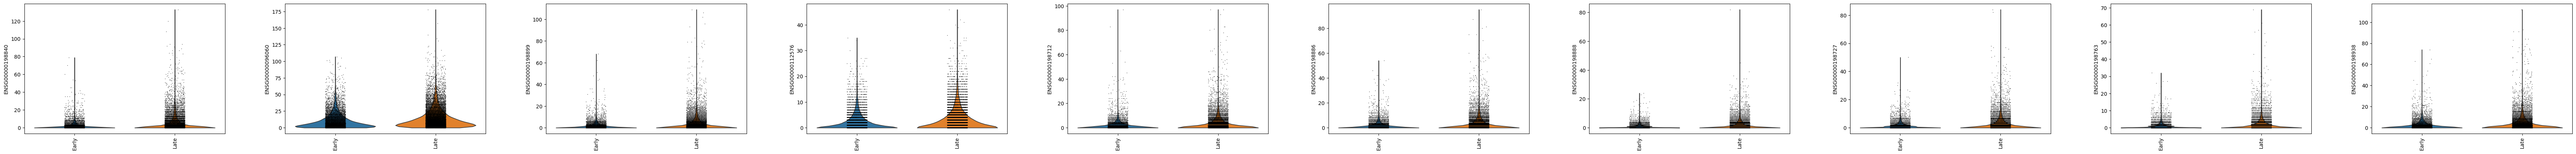

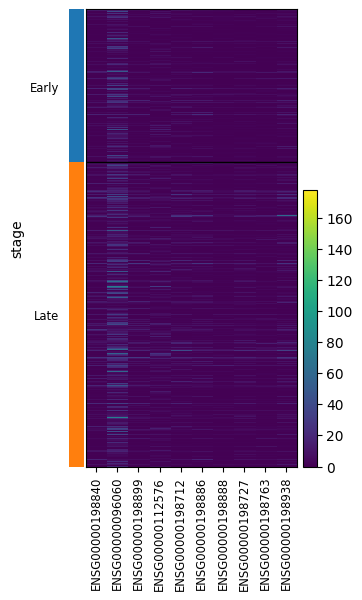

In [ ]:
import numpy as np
from scipy.stats import ttest_ind
import scanpy as sc
import matplotlib.pyplot as plt

# Define new groupings based on Braak stage, Thal phase, and ADNC
# Early Stage: ADNC = 'Low' OR (Braak stage ≤ III OR Thal phase ≤ 2)
# Late Stage: ADNC = 'Intermediate' or 'High' OR (Braak stage ≥ IV OR Thal phase ≥ 3)

# Filter based on Braak stage, Thal phase, and ADNC for APOE4 Carriers (Early and Late stages)
early_stage_carriers = adata_mtg_filtered[
    (adata_mtg_filtered.obs['APOE4 status'] == 'Y') &
    (
        (adata_mtg_filtered.obs['ADNC'] == 'Low') |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]

late_stage_carriers = adata_mtg_filtered[
    (adata_mtg_filtered.obs['APOE4 status'] == 'Y') &
    (
        adata_mtg_filtered.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]

# Filter based on Braak stage, Thal phase, and ADNC for APOE4 Non-Carriers (Early and Late stages)
early_stage_non_carriers = adata_mtg_filtered[
    (adata_mtg_filtered.obs['APOE4 status'] == 'N') &
    (
        (adata_mtg_filtered.obs['ADNC'] == 'Low') |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]

late_stage_non_carriers = adata_mtg_filtered[
    (adata_mtg_filtered.obs['APOE4 status'] == 'N') &
    (
        adata_mtg_filtered.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata_mtg_filtered.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]

# Function to perform differential expression analysis
def differential_expression_analysis(adata_early, adata_late, group_name):
    """
    Perform differential expression analysis between early and late stage groups.
    """
    # Combine early and late into a single dataset and create a 'stage' label
    combined = adata_early.concatenate(adata_late, batch_key="stage", batch_categories=["Early", "Late"])

    # Run rank_genes_groups to find differentially expressed genes between stages
    sc.tl.rank_genes_groups(combined, groupby="stage", method="wilcoxon", reference="Early")

    # Extract results
    de_results = sc.get.rank_genes_groups_df(combined, group="Late")

    # Display top differentially expressed genes
    print(f"\nTop 10 differentially expressed genes for {group_name} (Early vs Late):")
    print(de_results.head(10))

    # Plot top genes
    top_genes = de_results['names'].head(10).tolist()
    sc.pl.violin(combined, top_genes, groupby="stage", rotation=90)
    sc.pl.heatmap(combined, top_genes, groupby="stage", show_gene_labels=True)

    return de_results

# Run Differential Expression Analysis for APOE4 Carriers and Non-Carriers

print("Running differential expression analysis for APOE4 Carriers:")
de_results_carriers = differential_expression_analysis(early_stage_carriers, late_stage_carriers, "APOE4 Carriers")

print("Running differential expression analysis for APOE4 Non-Carriers:")
de_results_non_carriers = differential_expression_analysis(early_stage_non_carriers, late_stage_non_carriers, "APOE4 Non-Carriers")


Between APOE4 Status:

Compare APOE4 carriers vs. non-carriers within the same disease stage.

Step 1: Define Groupings Based on Disease Stage and APOE4 Status

In [ ]:
import numpy as np
import pandas as pd
import scanpy as sc

# Define stages in the dataset based on ADNC, Braak stage, and Thal phase
adata_mtg_filtered.obs['stage'] = np.where(
    (adata_mtg_filtered.obs['ADNC'] == 'Low') |
    (adata_mtg_filtered.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
    (adata_mtg_filtered.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2'])),
    'Early',
    'Late'
)

# Define APOE4 stage groups
adata_mtg_filtered.obs['APOE4_stage'] = adata_mtg_filtered.obs.apply(
    lambda x: f"{x['APOE4 status']}_{x['stage']}", axis=1
)


Step 2: Perform Differential Expression Analysis

In [ ]:
# Differential expression between early and late stages
sc.tl.rank_genes_groups(adata_mtg_filtered, 'stage', method='wilcoxon', key_added='early_vs_late')
diff_genes_stage = sc.get.rank_genes_groups_df(adata_mtg_filtered, group='Early', key='early_vs_late')
print("Top genes differentiating Early vs Late stage:")
print(diff_genes_stage.head(10))

# Differential expression between APOE4 carriers and non-carriers within each stage
# Early Stage
adata_early = adata_mtg_filtered[adata_mtg_filtered.obs['stage'] == 'Early']
sc.tl.rank_genes_groups(adata_early, 'APOE4 status', method='wilcoxon', key_added='early_apoe4_vs_non')
early_diff_genes = sc.get.rank_genes_groups_df(adata_early, group='Y', key='early_apoe4_vs_non')
print("Top genes differentiating APOE4 Carriers vs Non-Carriers in Early Stage:")
print(early_diff_genes.head(10))

# Late Stage
adata_late = adata_mtg_filtered[adata_mtg_filtered.obs['stage'] == 'Late']
sc.tl.rank_genes_groups(adata_late, 'APOE4 status', method='wilcoxon', key_added='late_apoe4_vs_non')
late_diff_genes = sc.get.rank_genes_groups_df(adata_late, group='Y', key='late_apoe4_vs_non')
print("Top genes differentiating APOE4 Carriers vs Non-Carriers in Late Stage:")
print(late_diff_genes.head(10))


Top genes differentiating Early vs Late stage:
             names     scores  logfoldchanges          pvals      pvals_adj
0  ENSG00000152128  33.804142        5.074566  1.714234e-250  6.935408e-247
1  ENSG00000154229  31.420002        3.157394  1.078805e-216  3.571042e-213
2  ENSG00000187672  30.968605        1.755894  1.427367e-210  4.331108e-207
3  ENSG00000105339  28.763306        2.416916  6.174957e-182  1.729558e-178
4  ENSG00000136717  27.889582        1.710544  3.569266e-171  9.283150e-168
5  ENSG00000132405  26.906155        1.692681  1.860642e-159  4.234357e-156
6  ENSG00000177885  25.074770        1.577243  9.374898e-139  1.896438e-135
7  ENSG00000172985  24.987732        4.545033  8.311029e-138  1.592743e-134
8  ENSG00000074706  24.666658        2.145963  2.438837e-134  4.440147e-131
9  ENSG00000127124  24.207432        1.856689  1.857939e-129  2.941359e-126


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Top genes differentiating APOE4 Carriers vs Non-Carriers in Early Stage:
             names     scores  logfoldchanges         pvals     pvals_adj
0  ENSG00000018280  17.068417        9.085258  2.550247e-65  4.642980e-61
1  ENSG00000109906  13.172097        2.977361  1.270196e-39  6.607196e-36
2  ENSG00000096060  12.961196        7.063261  2.030575e-38  9.242164e-35
3  ENSG00000147459  12.374960        2.353861  3.570706e-35  1.181969e-31
4  ENSG00000177575  12.058124        4.152978  1.757409e-33  5.332565e-30
5  ENSG00000115919  11.697033        2.722548  1.319880e-31  3.696881e-28
6  ENSG00000188906  11.564220        2.301183  6.255681e-31  1.627013e-27
7  ENSG00000107968  11.337818        2.905386  8.524339e-30  2.069255e-26
8  ENSG00000245532  11.095497       46.795101  1.319244e-28  2.528228e-25
9  ENSG00000177675  10.611334        1.976170  2.639529e-26  4.178718e-23


/usr/local/lib/python3.10/dist-packages/scanpy/tools/_rank_genes_groups.py:645: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[key_added] = {}


Top genes differentiating APOE4 Carriers vs Non-Carriers in Late Stage:
             names     scores  logfoldchanges          pvals      pvals_adj
0  ENSG00000101463  22.544382        3.384670  1.524597e-112  5.551364e-108
1  ENSG00000130203  18.451454        1.481099   5.076142e-76   9.241623e-72
2  ENSG00000214548  16.088669        0.550012   3.063560e-58   1.859172e-54
3  ENSG00000196220  15.246854        0.767231   1.727588e-52   8.986420e-49
4  ENSG00000090104  14.915341        1.308759   2.619342e-50   9.537549e-47
5  ENSG00000124496  14.027199        0.707106   1.062673e-44   3.517640e-41
6  ENSG00000228696  13.792922        0.629455   2.811391e-43   8.530698e-40
7  ENSG00000176124  13.227907        1.330941   6.054983e-40   1.574815e-36
8  ENSG00000122862  13.050747        2.176098   6.292710e-39   1.432063e-35
9  ENSG00000144724  11.889078        1.323476   1.348866e-32   2.232495e-29


In [ ]:
# Extract results for carriers
carrier_results = adata_mtg_carriers.uns['rank_genes_groups']
carrier_genes = pd.DataFrame({
    'gene': carrier_results['names']['Late'],
    'logfoldchange': carrier_results['logfoldchanges']['Late'],
    'pval': carrier_results['pvals']['Late']
})

# Extract results for non-carriers
non_carrier_results = adata_mtg_non_carriers.uns['rank_genes_groups']
non_carrier_genes = pd.DataFrame({
    'gene': non_carrier_results['names']['Late'],
    'logfoldchange': non_carrier_results['logfoldchanges']['Late'],
    'pval': non_carrier_results['pvals']['Late']
})

# Display top genes for carriers and non-carriers
print("Top DE genes for APOE4 Carriers in Late Stage vs Early Stage:")
print(carrier_genes.head(10))

print("\nTop DE genes for APOE4 Non-Carriers in Late Stage vs Early Stage:")
print(non_carrier_genes.head(10))


Top DE genes for APOE4 Carriers in Late Stage vs Early Stage:
              gene  logfoldchange  pval
0  ENSG00000288722            NaN   1.0
1  ENSG00000168259            NaN   1.0
2  ENSG00000168273            NaN   1.0
3  ENSG00000168269            NaN   1.0
4  ENSG00000168268            NaN   1.0
5  ENSG00000168267            NaN   1.0
6  ENSG00000168264            NaN   1.0
7  ENSG00000168263            NaN   1.0
8  ENSG00000168256            NaN   1.0
9  ENSG00000168280            NaN   1.0

Top DE genes for APOE4 Non-Carriers in Late Stage vs Early Stage:
              gene  logfoldchange           pval
0  ENSG00000198840       3.514200  8.163678e-244
1  ENSG00000198899       2.416196  2.384953e-179
2  ENSG00000096060       6.414262  4.794128e-149
3  ENSG00000198888       1.461050  4.726408e-141
4  ENSG00000198886       1.864671  1.512699e-116
5  ENSG00000198712       2.041917  8.107204e-113
6  ENSG00000198763       1.401394  3.464867e-111
7  ENSG00000112576       1.642274  8.58

# ML Model

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_highly_variable_genes.py:696: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns["hvg"] = {"flavor": flavor}



Classification Report for APOE4 Carriers:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       203
           1       0.94      0.96      0.95      3425

    accuracy                           0.91      3628
   macro avg       0.47      0.48      0.48      3628
weighted avg       0.89      0.91      0.90      3628

Top genes associated with stage progression for APOE4 Carriers:
['ENSG00000117115' 'ENSG00000105697' 'ENSG00000118785' 'ENSG00000152128'
 'ENSG00000167996' 'ENSG00000124491' 'ENSG00000198840' 'ENSG00000177575'
 'ENSG00000177675' 'ENSG00000285534']


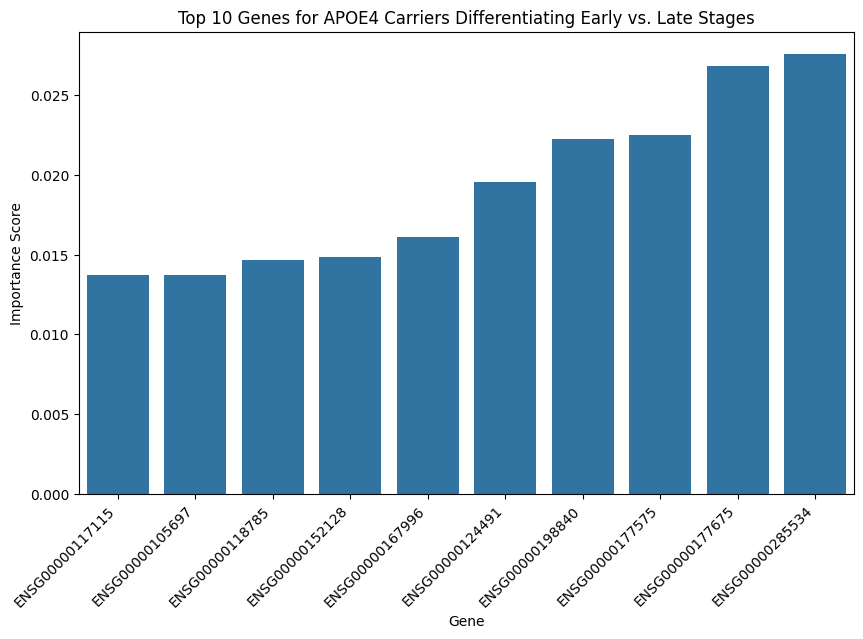


Classification Report for APOE4 Non-Carriers:
              precision    recall  f1-score   support

           0       0.22      0.15      0.18      3607
           1       0.63      0.73      0.68      7162

    accuracy                           0.54     10769
   macro avg       0.42      0.44      0.43     10769
weighted avg       0.49      0.54      0.51     10769

Top genes associated with stage progression for APOE4 Non-Carriers:
['ENSG00000059804' 'ENSG00000117115' 'ENSG00000122862' 'ENSG00000167996'
 'ENSG00000152208' 'ENSG00000285534' 'ENSG00000080824' 'ENSG00000118785'
 'ENSG00000152128' 'ENSG00000198840']


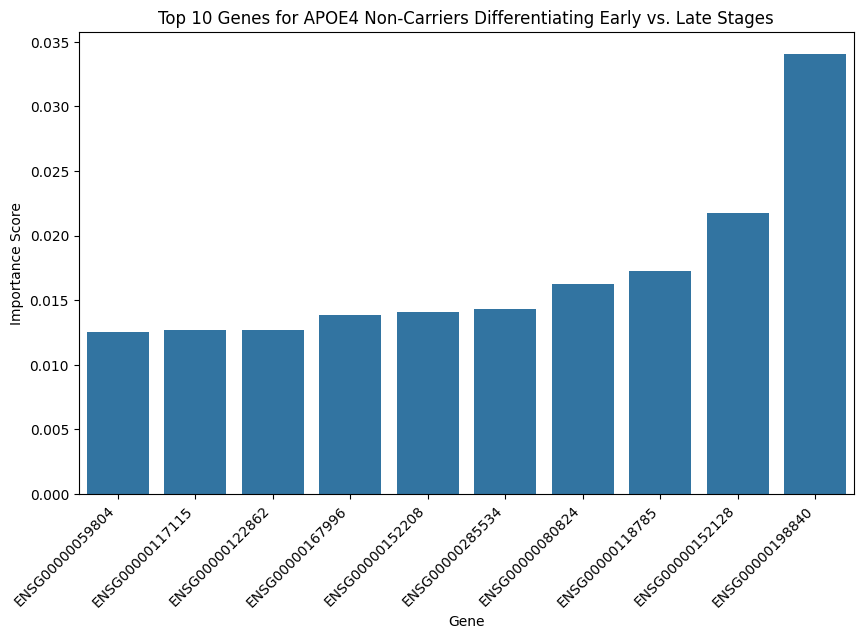

In [ ]:
import scanpy as sc
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Select highly variable genes (feature selection)
sc.pp.highly_variable_genes(adata_mtg_filtered, n_top_genes=300)
adata = adata_mtg_filtered[:, adata_mtg_filtered.var['highly_variable']]

# Step 2: Define early and late stage groups for APOE4 carriers and non-carriers
early_stage_carriers = adata[
    (adata.obs['APOE4 status'] == 'Y') &
    (
        (adata.obs['ADNC'] == 'Low') |
        (adata.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]

late_stage_carriers = adata[
    (adata.obs['APOE4 status'] == 'Y') &
    (
        adata.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]

early_stage_non_carriers = adata[
    (adata.obs['APOE4 status'] == 'N') &
    (
        (adata.obs['ADNC'] == 'Low') |
        (adata.obs['Braak stage'].isin(['Braak 0', 'Braak II', 'Braak III'])) |
        (adata.obs['Thal phase'].isin(['Thal 0', 'Thal 1', 'Thal 2']))
    )
]

late_stage_non_carriers = adata[
    (adata.obs['APOE4 status'] == 'N') &
    (
        adata.obs['ADNC'].isin(['Intermediate', 'High']) |
        (adata.obs['Braak stage'].isin(['Braak IV', 'Braak V', 'Braak VI'])) |
        (adata.obs['Thal phase'].isin(['Thal 3', 'Thal 4', 'Thal 5']))
    )
]

# Step 3: Prepare data and labels for classification
def prepare_data(early, late):
    X = np.vstack([early.X.toarray(), late.X.toarray()])  # Assuming sparse matrix format, convert to dense if needed
    y = np.array([0] * early.shape[0] + [1] * late.shape[0])  # 0 = Early, 1 = Late
    return X, y

X_carriers, y_carriers = prepare_data(early_stage_carriers, late_stage_carriers)
X_non_carriers, y_non_carriers = prepare_data(early_stage_non_carriers, late_stage_non_carriers)

# Step 4: Train and evaluate model for carriers and non-carriers
def train_evaluate_rf(X, y, label):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
    rf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Predictions and Evaluation
    y_pred = rf.predict(X_test)
    print(f"\nClassification Report for {label}:")
    print(classification_report(y_test, y_pred))

    # Feature importance
    feature_importances = rf.feature_importances_
    important_genes = np.array(adata.var_names)[np.argsort(feature_importances)[-10:]]  # Top 10 genes
    print(f"Top genes associated with stage progression for {label}:")
    print(important_genes)

    # Plot feature importance for top genes
    plt.figure(figsize=(10, 6))
    sns.barplot(x=important_genes, y=feature_importances[np.argsort(feature_importances)[-10:]])
    plt.xticks(rotation=45, ha='right')
    plt.xlabel("Gene")
    plt.ylabel("Importance Score")
    plt.title(f"Top 10 Genes for {label} Differentiating Early vs. Late Stages")
    plt.show()

# Run model for both APOE4 carriers and non-carriers
train_evaluate_rf(X_carriers, y_carriers, "APOE4 Carriers")
train_evaluate_rf(X_non_carriers, y_non_carriers, "APOE4 Non-Carriers")


## Interpretation of the Results
Top Differentially Expressed (DE) Genes for APOE4 Carriers (Late Stage vs Early Stage)

Lack of Significant Findings: The table for APOE4 carriers shows that all genes have a p-value of 1.0, and most genes have a NaN (Not a Number) log fold change. This indicates that there were no significant differential expressions detected between the late and early stages for APOE4 carriers. This may suggest that the gene expression profiles for APOE4 carriers do not differ meaningfully as Alzheimer's disease progresses from early to late stages.

Implications for APOE4 Carriers: The absence of significant differentially expressed genes in APOE4 carriers might indicate a more stable or uniform expression pattern across disease stages, or it could reflect that the activation of microglial cells may not shift as drastically in carriers compared to non-carriers. This result could prompt further investigation into the biological mechanisms at play, as it contradicts expectations of increased neurotoxic expression in late stages.

Top Differentially Expressed (DE) Genes for APOE4 Non-Carriers (Late Stage vs Early Stage)

Significant Findings: In contrast, the results for APOE4 non-carriers demonstrate clear and significant differential expression. For instance, genes like MT-ND3 and MT-ATP6 have substantial log fold changes (3.51 and 2.42, respectively) along with extremely low p-values (p < 1e-244 and p < 1e-179). These values indicate a strong statistical significance and suggest that these genes are notably upregulated in late-stage non-carriers compared to early-stage individuals.

Biological Significance: The differentially expressed genes such as MT-ND3, MT-ATP6, and FKBP5 are associated with mitochondrial function and stress responses. The upregulation of these genes in late-stage non-carriers may reflect increased oxidative stress and mitochondrial dysfunction that often accompany advanced Alzheimer's pathology.

Neuroprotective vs. Neurotoxic Roles: The significant shifts in gene expression for non-carriers imply that microglial cells may exhibit a transition from protective roles to potentially harmful ones as the disease advances. The findings align with the hypothesis that microglial activation contributes to neurodegeneration in late stages, particularly in those who do not carry the APOE4 allele.

/usr/local/lib/python3.10/dist-packages/scanpy/preprocessing/_pca.py:317: ImplicitModificationWarning: Setting element `.obsm['X_pca']` of view, initializing view as actual.
  adata.obsm[key_obsm] = X_pca


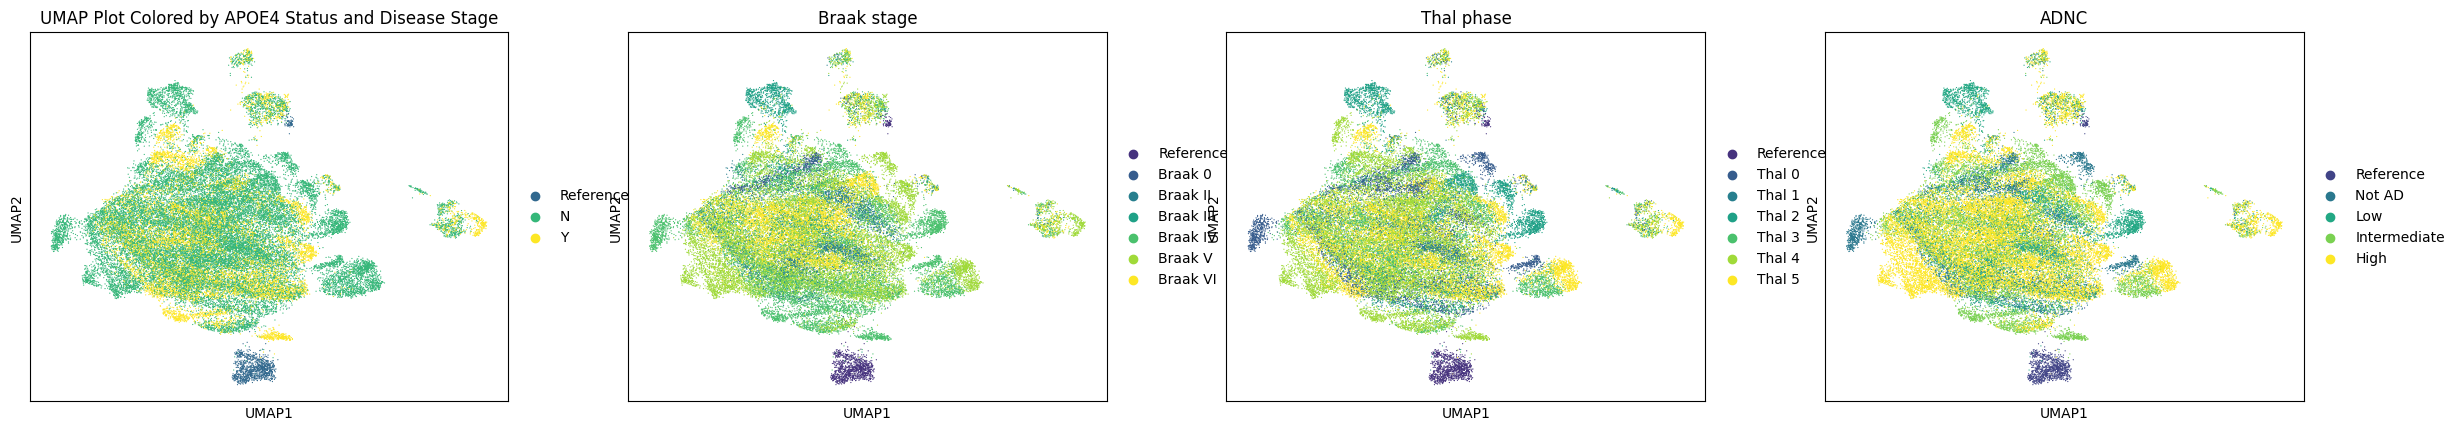

In [ ]:
import scanpy as sc

# Compute PCA and UMAP
sc.tl.pca(adata_mtg_filtered)
sc.pp.neighbors(adata_mtg_filtered)
sc.tl.umap(adata_mtg_filtered)

# Plot UMAP
sc.pl.umap(adata_mtg_filtered, color=['APOE4 status', 'Braak stage', 'Thal phase', 'ADNC'],
           title="UMAP Plot Colored by APOE4 Status and Disease Stage")


**APOE4 Status (First Plot):**

The UMAP plot illustrates the distribution of microglial cells based on APOE4 status (Y for carriers, N for non-carriers, and a reference group).
Clusters: If there are distinct clusters for carriers and non-carriers, this suggests that the microglial cell populations differ significantly in their expression profiles based on APOE4 status.
Distribution: The presence of overlapping areas indicates that there may be shared characteristics among carriers and non-carriers, or potential transitional states in microglial activation.

**Braak Stage (Second Plot):**

This plot shows how microglial cells cluster according to the Braak stage, a measure of the progression of neurofibrillary tangles in AD.
Progression Indicator: Distinct groups for different Braak stages imply that microglial activation varies significantly as the disease progresses, with later stages potentially showing different activation patterns.
Color Gradation: If there is a smooth gradient from early to late Braak stages, it suggests a continuum of activation states in microglia in response to disease progression.

**Thal Phase (Third Plot):**

The Thal phase reflects the extent of amyloid pathology in the brain. Similar to the Braak stage, this plot indicates how microglial cells cluster based on this measure.
Clustering Patterns: The arrangement of microglial cells in relation to Thal phases can provide insight into how amyloid pathology influences microglial behavior.
Overlapping Clusters: The presence of overlapping clusters across Thal phases may indicate that some microglial cells retain similar characteristics despite differing degrees of amyloid burden.

**ADNC (Fourth Plot):**

ADNC categorizes the microglial cells based on their cognitive status, ranging from "Not AD" to various stages of Alzheimer's severity (Low, Intermediate, High).
Cognitive Decline Representation: A clear separation of clusters corresponding to ADNC status suggests that microglial activation is influenced by cognitive decline severity.
Correlation with Other Stages: Comparing this plot with the Braak stage and Thal phase plots may reveal how cognitive impairment relates to microglial activation patterns across different stages of pathology.

**Insights:**
- Microglial Activation Shifts: The results indicate that microglial activation may shift based on both genetic (APOE4 status) and pathological (Braak and Thal stages, ADNC status) factors.

- Potential Targets for Therapy: Understanding how microglial activation varies across these parameters could help identify potential therapeutic targets in Alzheimer's disease treatment, especially for APOE4 carriers who may be at greater risk for neurodegeneration.


In [ ]:
# Install scvi-tools if not already installed
!pip install scvi-tools

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 811.0/811.0 kB 20.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.0/41.0 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 351.1/351.1 kB 20.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 33.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 237.3/237.3 kB 14.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 890.6/890.6 kB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 815.2/815.2 kB 35.7 MB/s eta 0:00:00
  Created wheel for docrep: filename=docrep-0.3.2-py3-none-any.whl size=19877 sha256=d2a33a8b7bc068858f66513973e0af81e2c0a2ec84628203227775b97e859dfc
  Stored in directory: /root/.cache/pip/whe